In [1]:
import rasterio as rio

In [2]:
sentinel = rio.open("C:/git/sandbox/Python/geoprocessing/Imersão/Aula 4/recorte.tif")

In [3]:
sentinel

<open DatasetReader name='C:/git/sandbox/Python/geoprocessing/Imersão/Aula 4/recorte.tif' mode='r'>

In [4]:
sentinel.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 310,
 'height': 254,
 'count': 10,
 'crs': CRS.from_epsg(32722),
 'transform': Affine(20.0, 0.0, 743460.0,
        0.0, -20.0, 7460220.0)}

In [5]:
from rasterio.plot import show

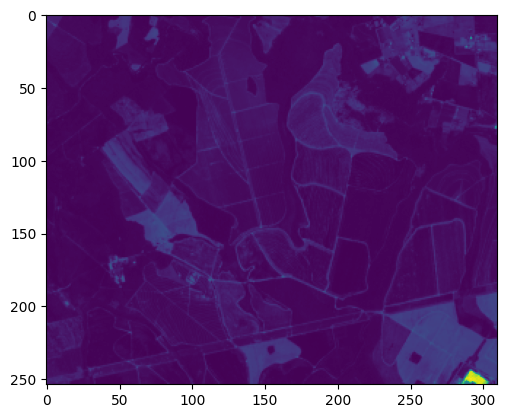

<AxesSubplot: >

In [6]:
show(sentinel.read(3))

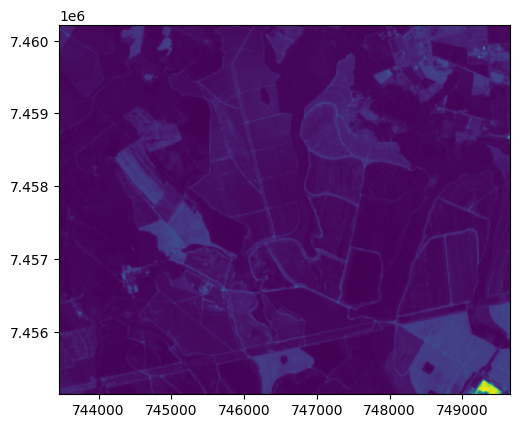

<AxesSubplot: >

In [7]:
show(sentinel.read(3), transform = sentinel.transform)

In [9]:
import matplotlib.pyplot as plt

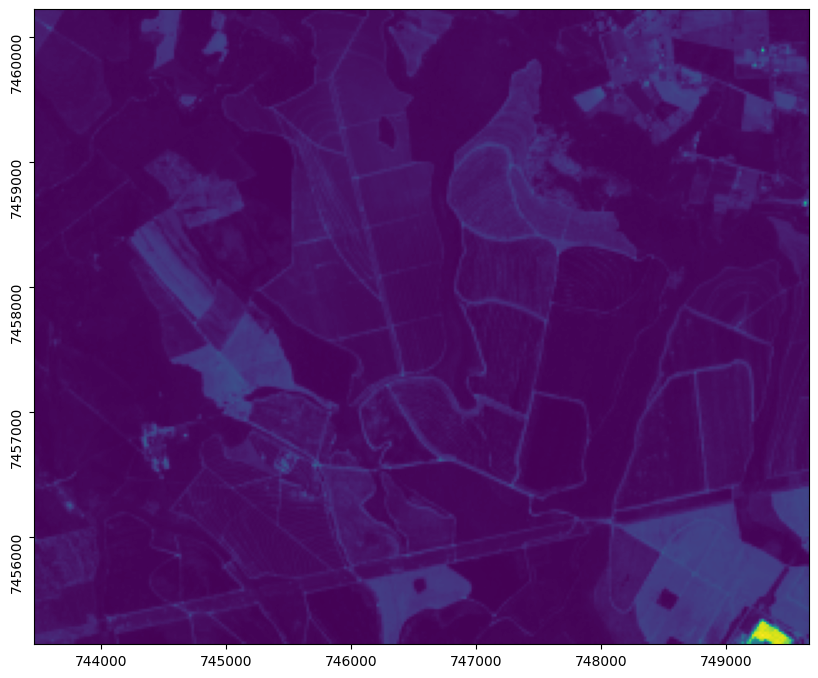

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
show(sentinel.read(3), ax = ax, transform = sentinel.transform)
ax.ticklabel_format(useOffset = False, style = "plain")
plt.yticks(rotation = 90)
plt.show()

In [11]:
nir = sentinel.read(8) # no satelite sentinel, a banda de infravermelho é a 8
red = sentinel.read(4)

In [12]:
nir

array([[1587., 1595., 1611., ...,  712.,  633.,  504.],
       [1572., 1595., 1616., ...,  738.,  644.,  496.],
       [1640., 1618., 1619., ...,  730.,  674.,  536.],
       ...,
       [1669., 1754., 1796., ..., 1566., 1935., 1313.],
       [1725., 1744., 1718., ..., 1184., 1665., 1682.],
       [1615., 1619., 1585., ..., 1104., 1345., 1638.]], dtype=float32)

In [13]:
ndvi = (nir - red) / (nir + red) # formula padrão do indice de vegetação normalizado, para detectar o estado e saude da vegetação
ndvi

array([[ 0.11017838,  0.11111111,  0.10418095, ..., -0.01793103,
        -0.08127721, -0.15008432],
       [ 0.112133  ,  0.10725442,  0.10571331, ..., -0.01336898,
        -0.07934239, -0.15358362],
       [ 0.12021858,  0.11817554,  0.11848014, ..., -0.02731512,
        -0.056683  , -0.12916328],
       ...,
       [ 0.09120627,  0.0972787 ,  0.0944546 , ...,  0.05561173,
         0.16181327,  0.07096248],
       [ 0.09177215,  0.08829954,  0.09811442, ...,  0.1406551 ,
         0.08965968,  0.03126916],
       [ 0.08864173,  0.09097035,  0.0885989 , ...,  0.07184466,
        -0.00296516,  0.01204819]], dtype=float32)

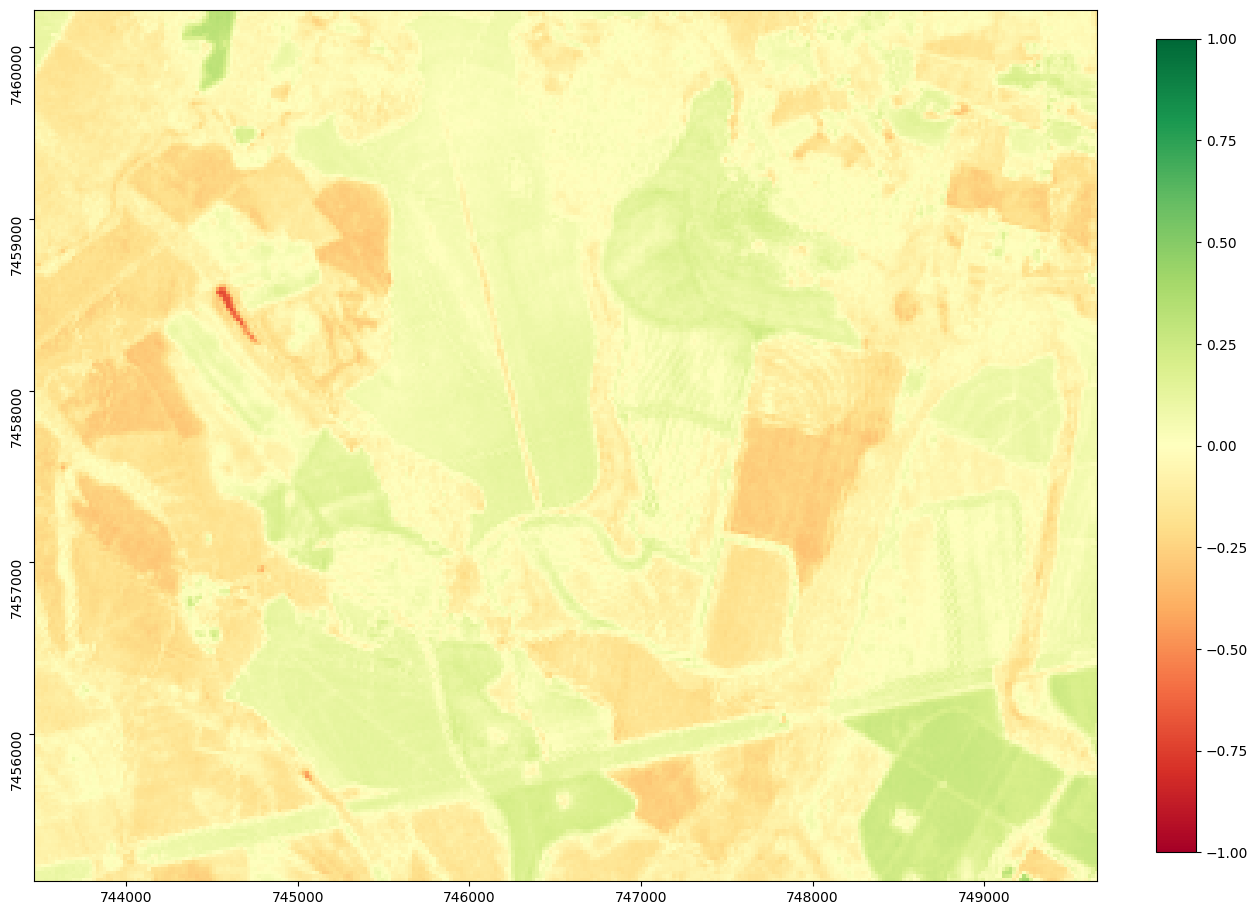

In [17]:
fig, ax = plt.subplots(figsize = (15, 15))
show(ndvi, ax = ax, transform = sentinel.transform, cmap = "RdYlGn", vmin = -1, vmax = 1) #RdYlGn_r é a versão reversa da coloração
ax.ticklabel_format(useOffset=False, style = "plain")
plt.yticks(rotation = 90)
im = ax.get_images()[0]
fig.colorbar(im, ax = ax, fraction = 0.035)
plt.show()

In [19]:
import ee
import geemap # é a biblioteca referente ao google
import geopandas as gpd
import numpy as np

In [20]:
ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


EEException: Not signed up for Earth Engine or project is not registered. For help, visit https://developers.google.com/earth-engine/cloud/earthengine_cloud_project_setup

In [21]:
import geobr

In [22]:
geobr.lookup_muni("Hortolândia") #para procurar um municipio pelo nome

,code_muni,name_muni,code_state,name_state,abbrev_state,code_micro,name_micro,code_meso,name_meso,code_immediate,name_immediate,code_intermediate,name_intermediate
3483,3519071,HortolÃ¢ndia,35,SÃ£o Paulo,SP,35032,Campinas,3507,Campinas,350038,Campinas,3510,Campinas


In [29]:
horto = geobr.read_municipality(code_muni = 3519071, year = 2020)
horto.head()

c:\Program Files\Python39\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
217,3519071.0,Hortolândia,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.23011 -22.82591, -47.22173..."
